# Seaborn Pair Grid
-  https://seaborn.pydata.org/generated/seaborn.PairGrid.html
-  class seaborn.PairGrid(data, *, hue=None, vars=None, x_vars=None, y_vars=None, hue_order=None, palette=None, hue_kws=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False)

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data    

In [2]:
# data
mtcars = data('mtcars')
iris = data('iris')
glue = sns.load_dataset('glue')
penguins = sns.load_dataset("penguins")

In [3]:
mtcars.head(2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [4]:
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa


In [5]:
glue.head(2)

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6


In [6]:
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female


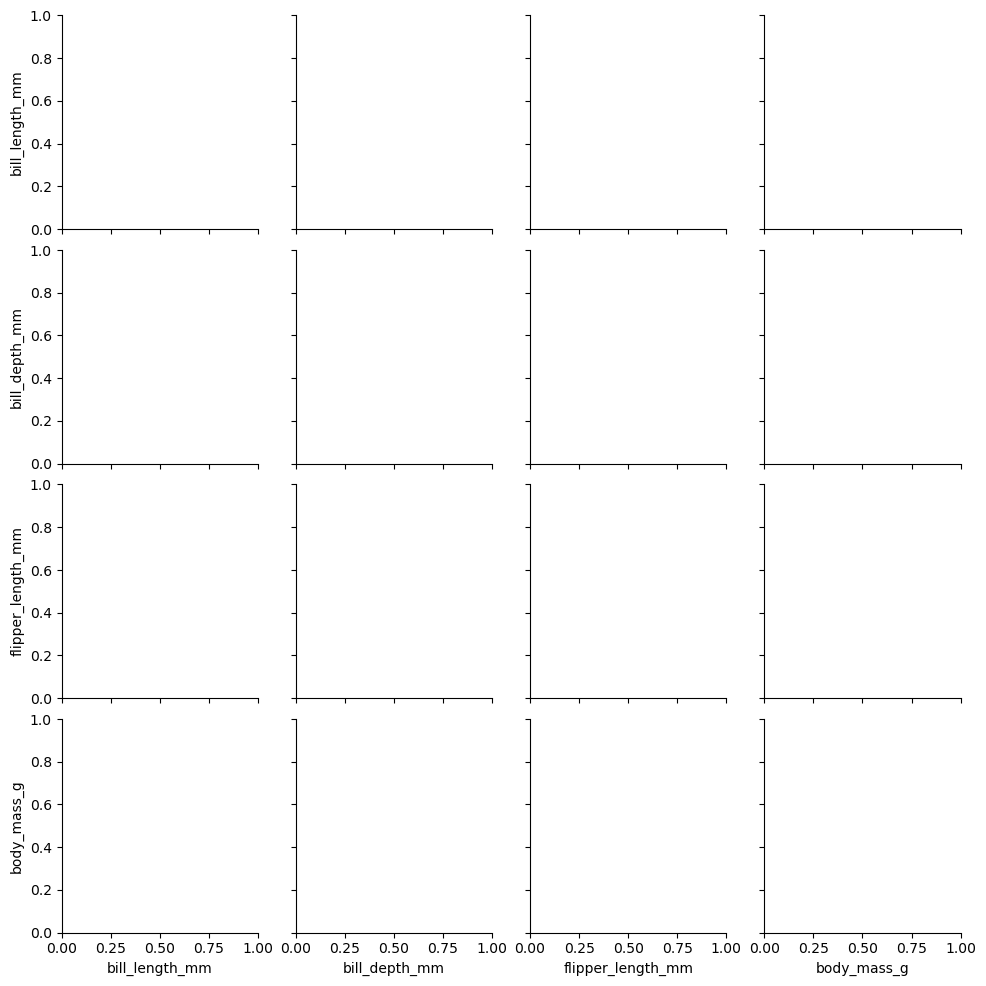

In [9]:
#Calling the constructor sets up a blank grid of subplots with each row and one 
#column corresponding to a numeric variable in the dataset:
g = sns.PairGrid(penguins)

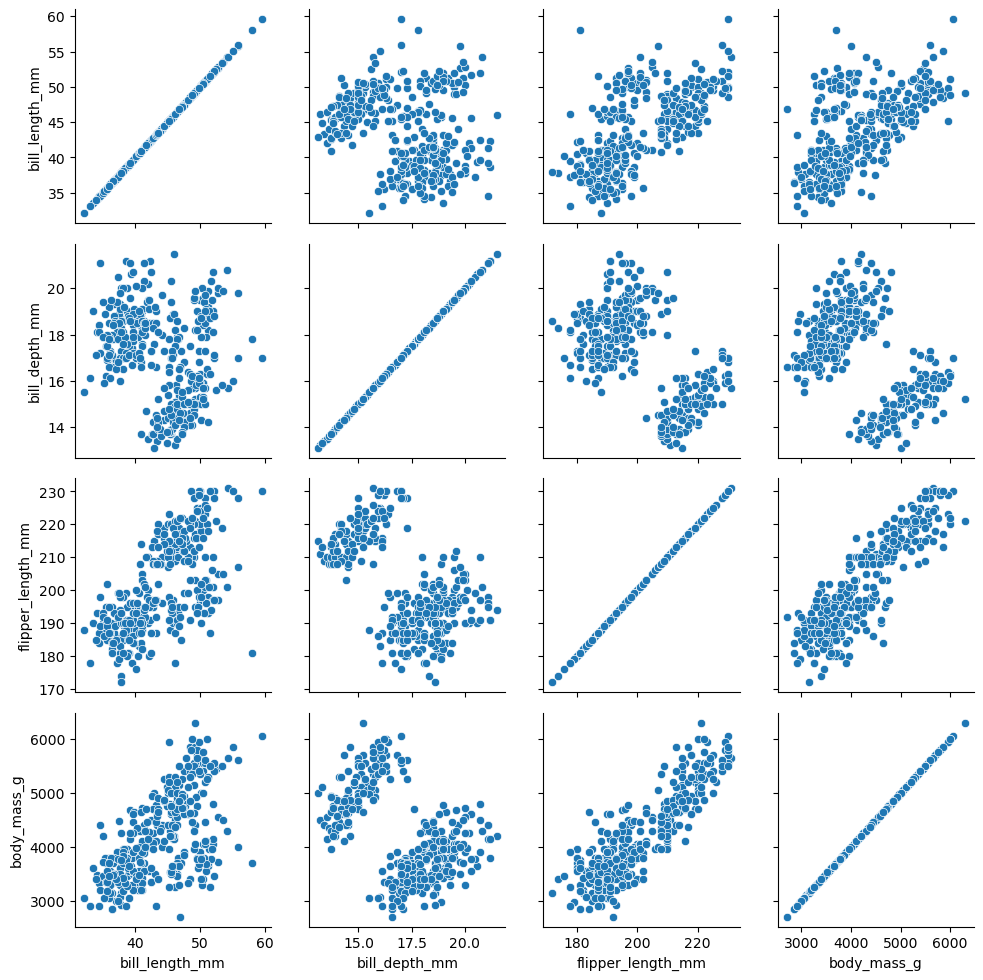

In [10]:
#Passing a bivariate function to PairGrid.map() will draw a bivariate plot on every axes:
g = sns.PairGrid(penguins)
g.map(sns.scatterplot)

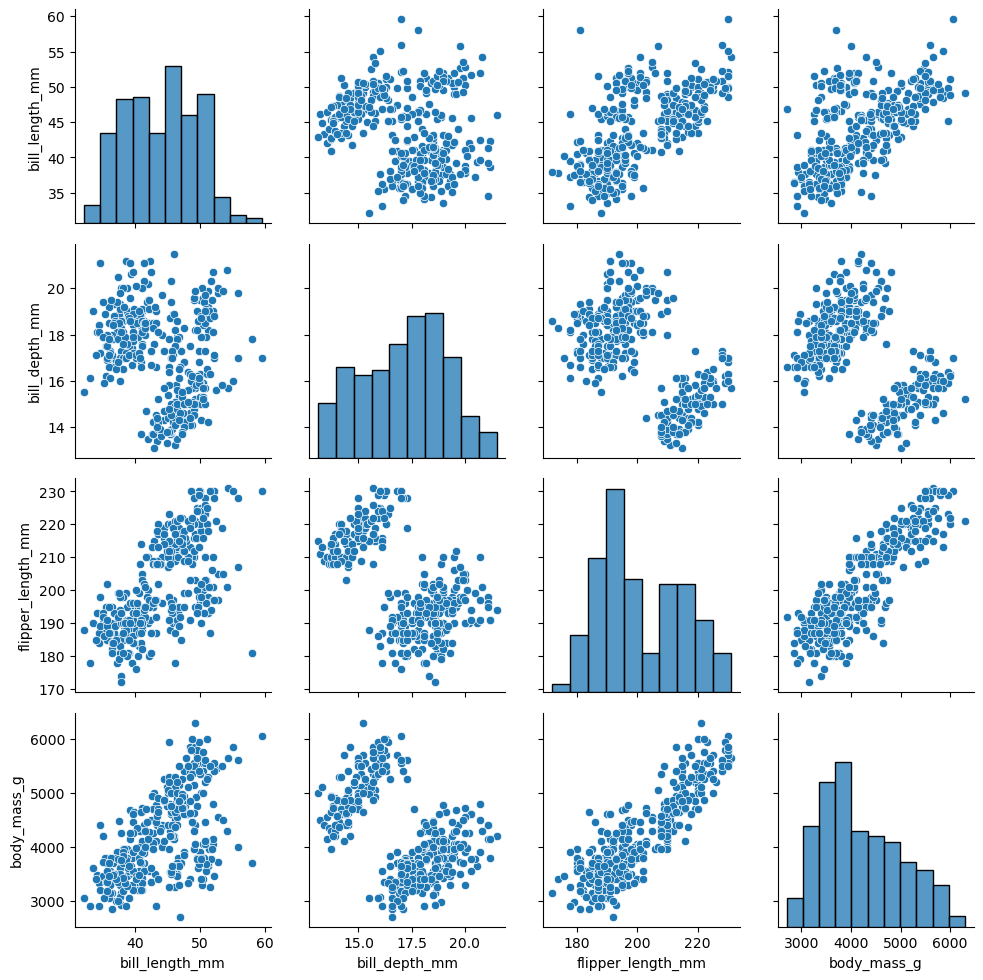

In [11]:
#Passing separate functions to PairGrid.map_diag() and PairGrid.map_offdiag() will show each variable’s marginal distribution on the diagonal:
g = sns.PairGrid(penguins)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

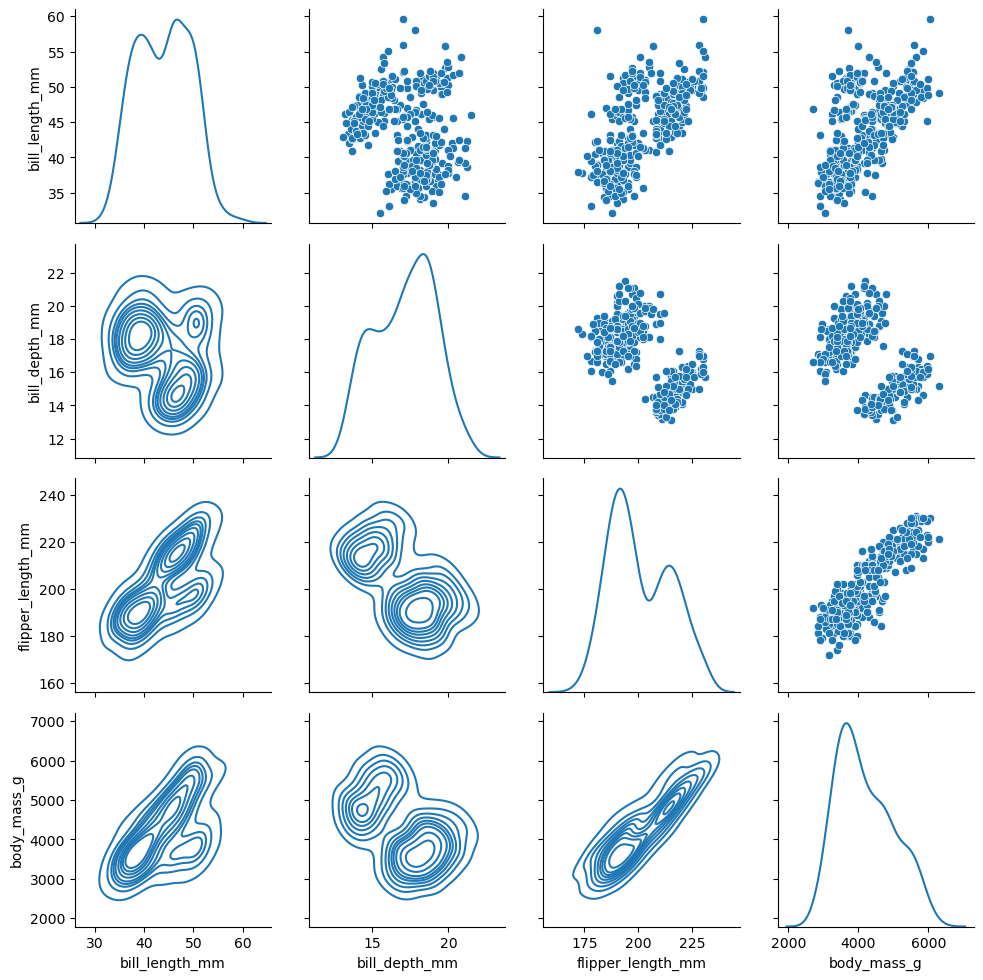

In [12]:
#t’s also possible to use different functions on the upper and lower triangles of the plot (which are otherwise redundant):
g = sns.PairGrid(penguins, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)

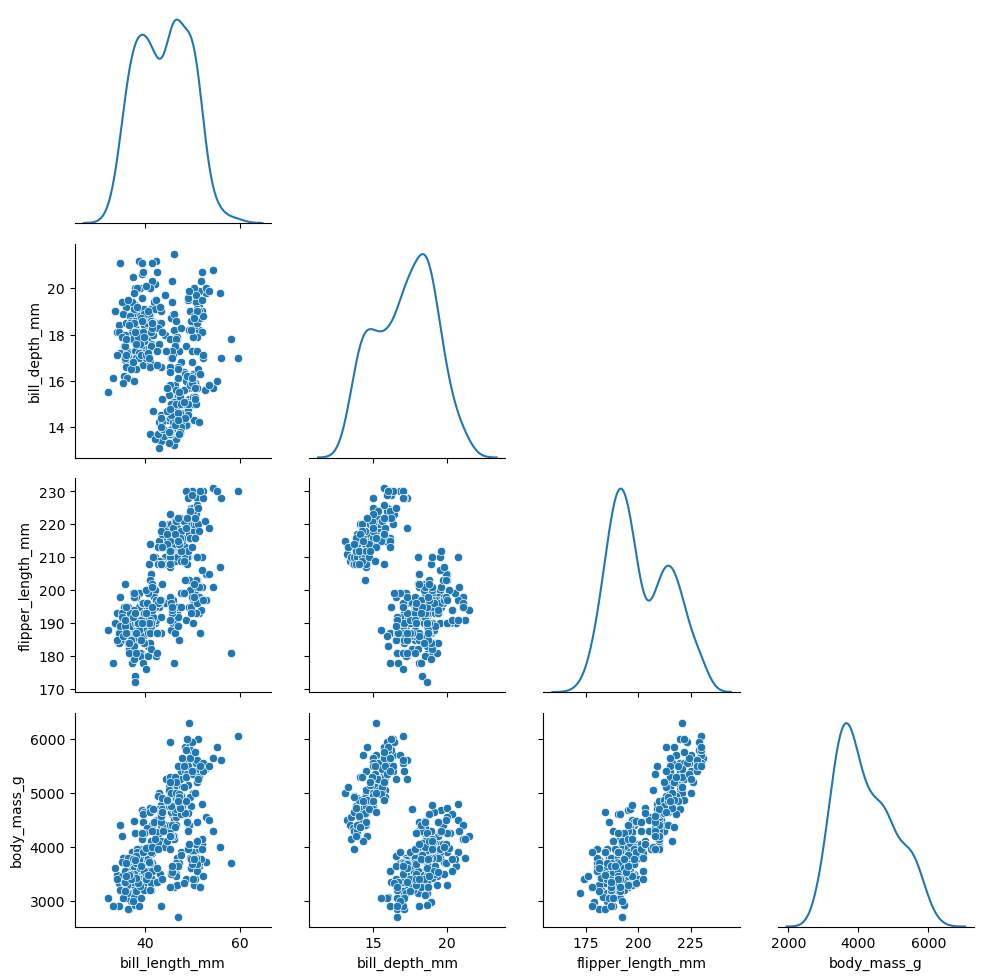

In [13]:
#Or to avoid the redundancy altogether:
g = sns.PairGrid(penguins, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

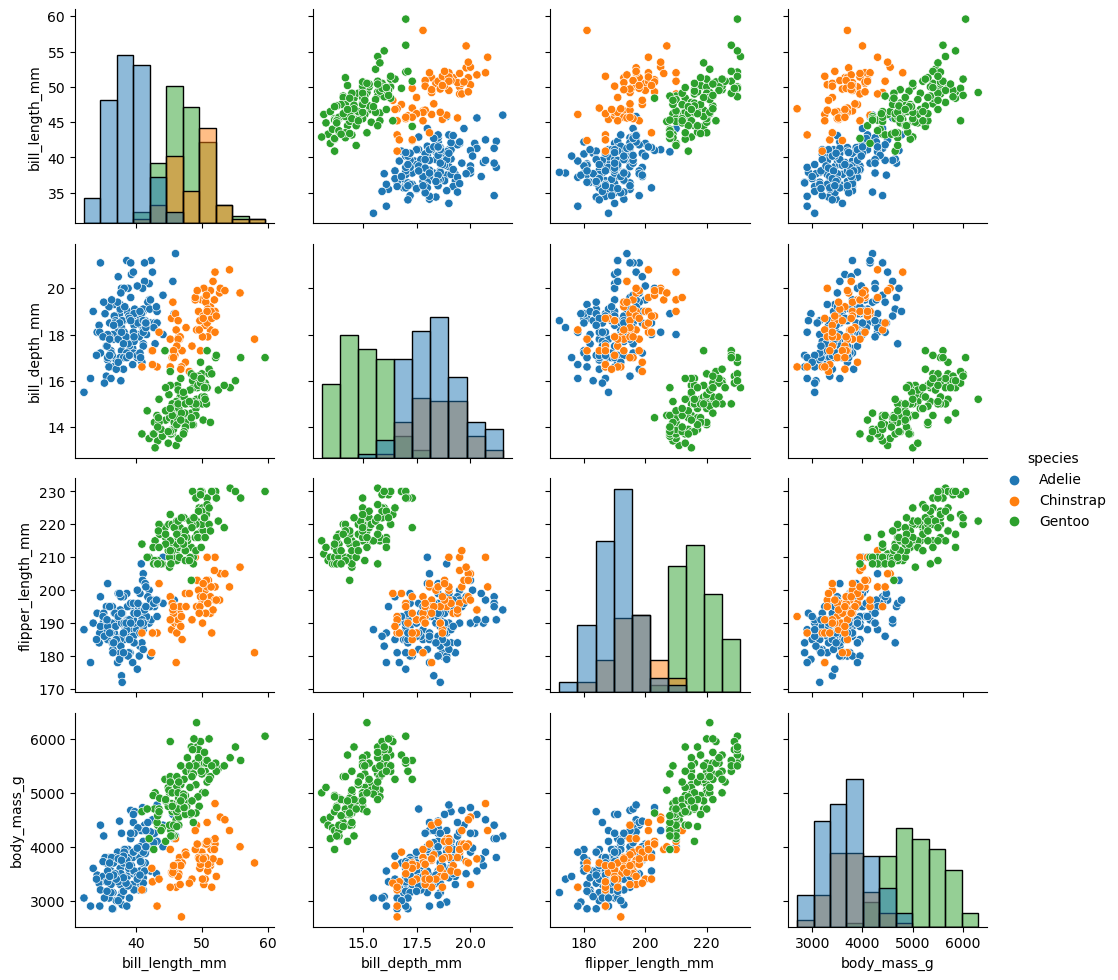

In [14]:
#The PairGrid constructor accepts a hue variable. This variable is passed directly to functions that understand it:

g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

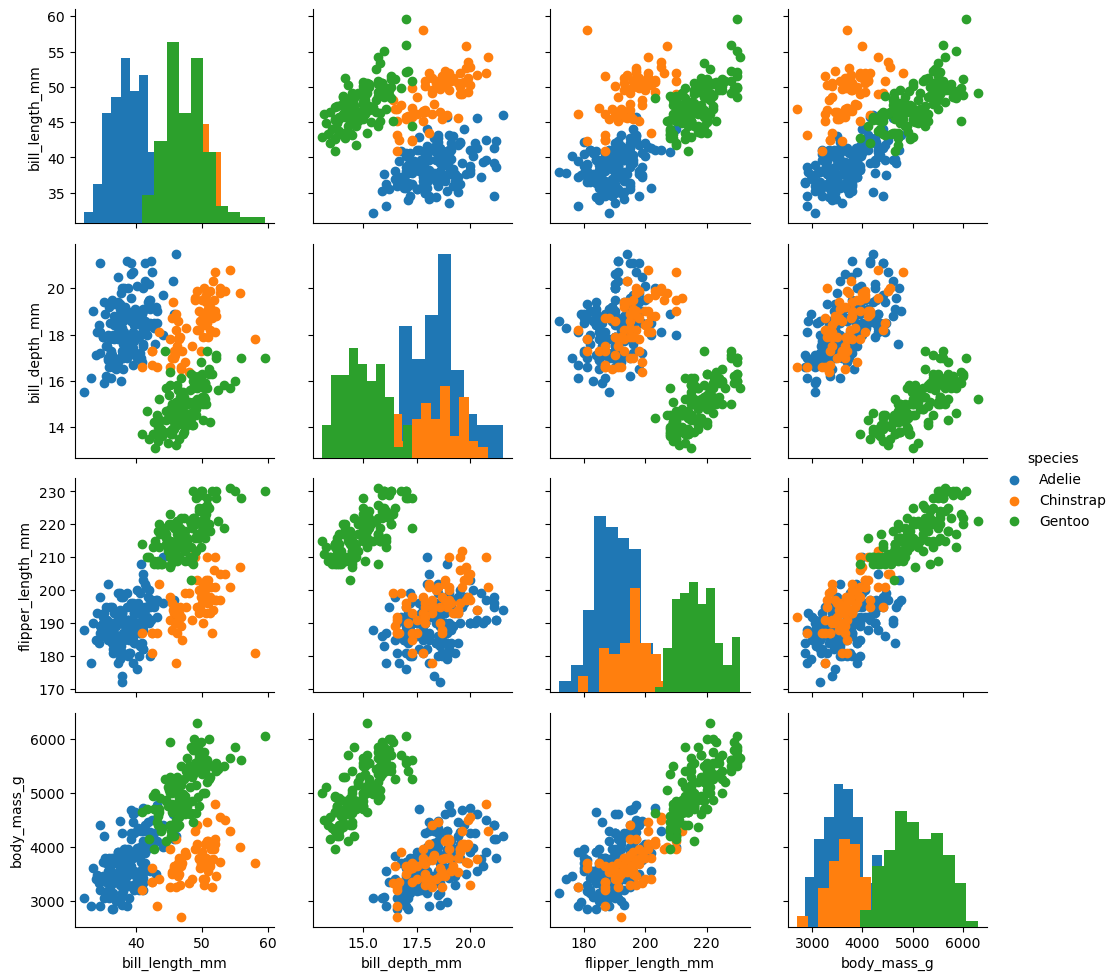

In [15]:
#ut you can also pass matplotlib functions, in which case a groupby is performed internally and a separate plot is drawn for each level:

g = sns.PairGrid(penguins, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

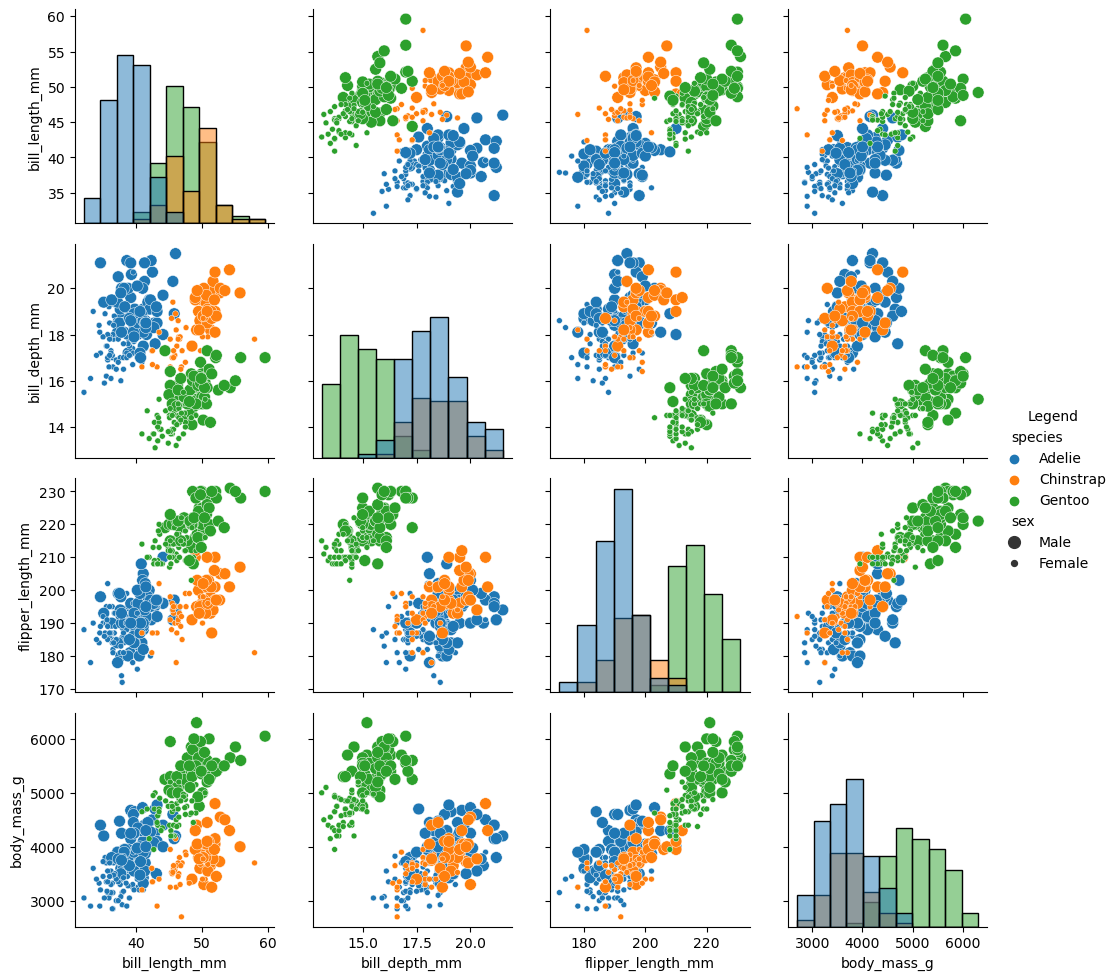

In [17]:
#dditional semantic variables can be assigned by passing data vectors directly while mapping the function:
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot, size=penguins["sex"])
g.add_legend(title="Legend", adjust_subtitles=True)

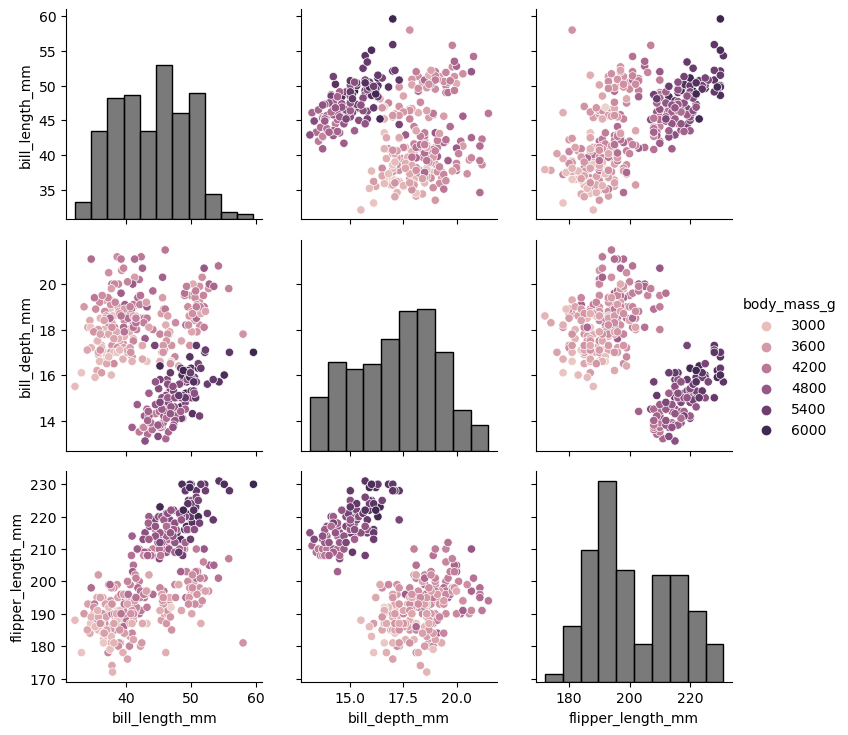

In [18]:
#When using seaborn functions that can implement a numeric hue mapping, 
#you will want to disable mapping of the variable on the diagonal axes. 
#Note that the hue variable is excluded from the list of variables shown by default:

g = sns.PairGrid(penguins, hue="body_mass_g")
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

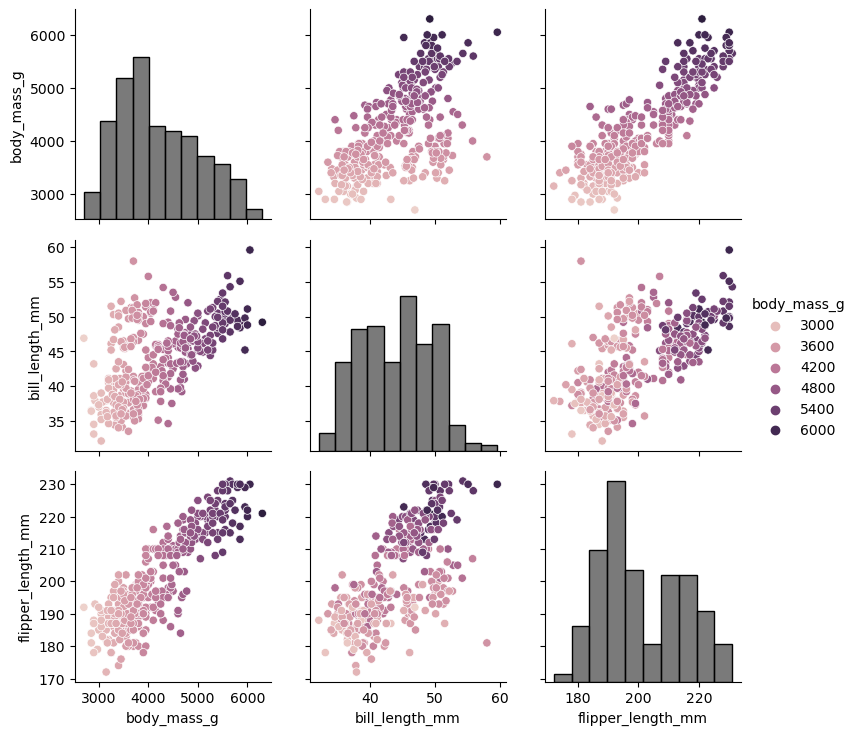

In [19]:
#he vars parameter can be used to control exactly which variables are used:
variables = ["body_mass_g", "bill_length_mm", "flipper_length_mm"]
g = sns.PairGrid(penguins, hue="body_mass_g", vars=variables)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

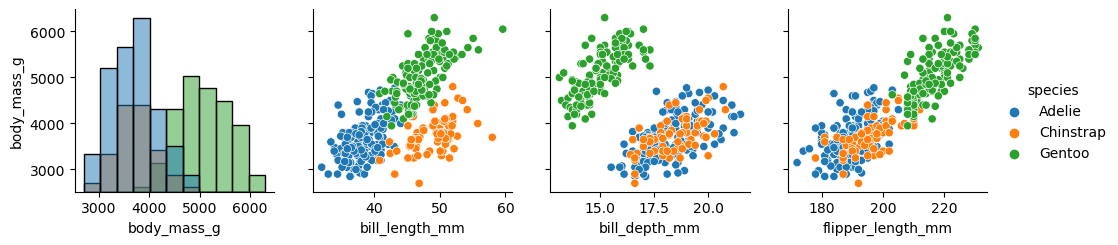

In [20]:
#The plot need not be square: separate variables can be used to define the rows and columns:

x_vars = ["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
y_vars = ["body_mass_g"]
g = sns.PairGrid(penguins, hue="species", x_vars=x_vars, y_vars=y_vars)
g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

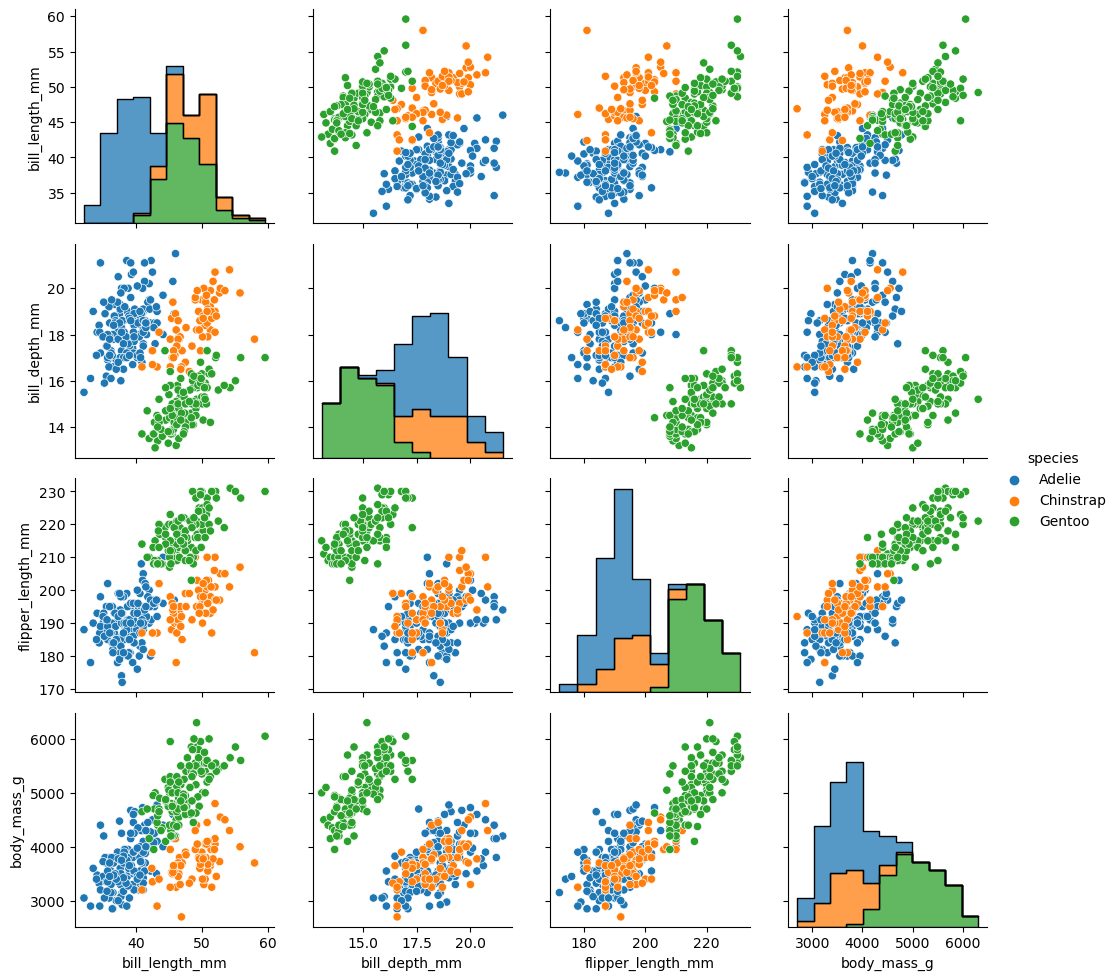

In [21]:
#It can be useful to explore different approaches to resolving multiple distributions on the diagonal axes:

g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()